In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
from keras.models import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, merge
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.models import load_model

plt.rcParams['figure.figsize'] = (7,7)

C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Anku\.conda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
def split_train_test(data, test_ratio, state = 7):    
    shuffled_indices = np.random.RandomState(seed=state).permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return train_indices, test_indices 

In [3]:
def get_size(path, classes):
    size = 0
    for cl in classes:
        size += len(next(os.walk(path + cl))[2])
    ans = [size]
    one_path = path + classes[0] + '/' + next(os.walk(path + classes[0]))[2][0]
    one_im = cv2.imread(one_path)
    ans.extend(list(one_im.shape))
    return tuple(ans)

In [4]:
def img_data_reader(path, classes):
    if path[-1] != '/':
        path += '/'
    size = get_size(path, classes)
    X_cols = np.zeros(size).astype(np.uint8)
    Y_cols = np.zeros((size[0], len(classes))).astype(np.uint8)
    last_bound = 0
    for i in range(len(classes)):
        images = next(os.walk(path + classes[i]))[2]
        for j in range(len(images)):
            X_cols[last_bound + j] = cv2.imread(path + classes[i] + '/' + images[j])
            Y_cols[last_bound + j][i] = 1
        last_bound += len(images)
    return X_cols, Y_cols

In [5]:
#Классы:
#per - пересечение
#o - объединение
#pr - принадлежность
#pm - пустое множество 
#

classes = ['per', 'o', 'pr', 'pm']
path1 = 'C:\\Users\\Anku\\Desktop\\img\\data\\1'
path2 = 'C:\\Users\\Anku\\Desktop\\img\\data\\2'

In [6]:
X_1, Y_1 = img_data_reader(path1, classes)
X_2, Y_2 = img_data_reader(path2, classes)

X_train = X_1
Y_train = Y_1
X_test = X_2
Y_test = Y_2

X_full = np.concatenate([X_1, X_2])
Y_full = np.concatenate([Y_1, Y_2,])

In [7]:
train_i, test_i = split_train_test(X_full, 0.2)

X_train_2, Y_train_2 = X_full[train_i], Y_full[train_i]
X_test_2, Y_test_2 = X_full[test_i], Y_full[test_i]

In [8]:
epc = 50
batch = 50

input_size = 44 * 44
classes = 4

b_size = 32 
k_size = 3  
p_size = 2
depth_1 = 8
depth_2 = 16
depth_3 = 24
drop_p = 0.2
h_size = 128

In [9]:
inpt = Input(shape = X_train.shape[1:])

conv_1 = Conv2D(depth_1, kernel_size=k_size, activation="relu", kernel_initializer="he_uniform")(inpt)

pool_1 = MaxPooling2D(pool_size=(p_size, p_size))(conv_1)

conv_2 = Conv2D(depth_2, kernel_size=k_size, activation="relu", kernel_initializer="he_uniform")(pool_1)

pool_2 = MaxPooling2D(pool_size=(p_size, p_size))(conv_2)

conv_3 = Conv2D(depth_3, kernel_size=k_size, activation="relu", kernel_initializer="he_uniform")(pool_2)


flat = Flatten()(conv_2) # makes 1D

drop_1 = Dropout(drop_p)(flat)
hid_1 = Dense(h_size, kernel_initializer="he_uniform", activation='relu')(drop_1)
hid_1 = BatchNormalization(axis=1)(hid_1)
 

drop_2 = Dropout(drop_p)(hid_1)
outpt = Dense(4, kernel_initializer="glorot_uniform", activation='softmax')(drop_2)

In [10]:
model = Model(input = inpt, output = outpt)

C:\Users\Anku\.conda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


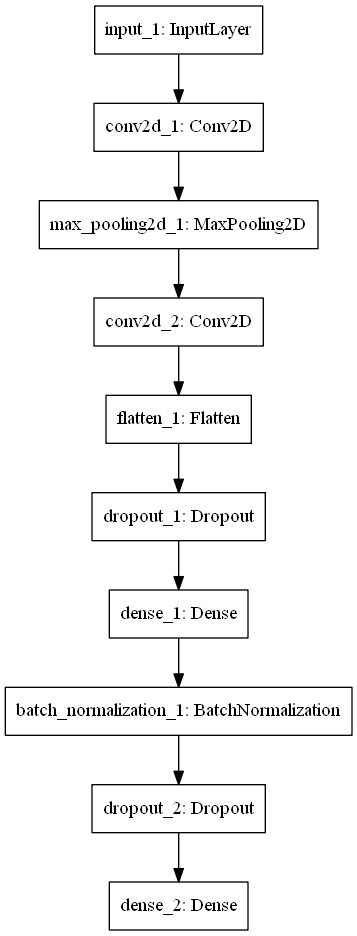

In [11]:
from keras.utils import plot_model
plot_model(model,'ConvolutionalNetworkStructure.png')

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.save("clear2.h5")


Train on 400 samples, validate on 400 samples
Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 1.2855 - accuracy: 0.5050 - val_loss: 58.5910 - val_accuracy: 0.2500
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.8300 - val_loss: 39.4943 - val_accuracy: 0.2500
Epoch 3/50
400/400 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9375 - val_loss: 24.4677 - val_accuracy: 0.2500
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0954 - accuracy: 0.9750 - val_loss: 13.4323 - val_accuracy: 0.2500
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0569 - accuracy: 0.9875 - val_loss: 6.6607 - val_accuracy: 0.2575
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9875 - val_loss: 3.6642 - val_accuracy: 0.4425
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 0.0361 - accuracy: 0.99

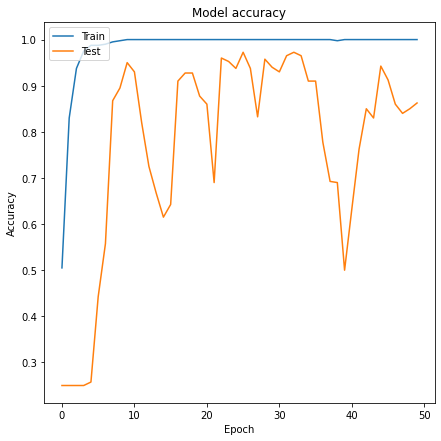

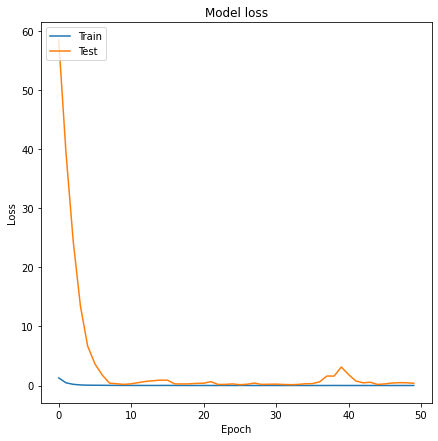

In [14]:
#Обучение на первом наборе (50/50)

hist = model.fit(X_train, Y_train, batch_size = b_size, epochs = epc, validation_data=(X_test, Y_test)
)
test_acc = model.evaluate(X_train,  Y_train, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model.evaluate(X_test,  Y_test, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('311.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('312.png')
plt.show()

In [15]:
model = load_model("clear2.h5")

Train on 640 samples, validate on 160 samples
Epoch 1/50
640/640 [==============================] - 1s 1ms/step - loss: 1.2506 - accuracy: 0.5031 - val_loss: 21.7222 - val_accuracy: 0.3063
Epoch 2/50
640/640 [==============================] - 0s 728us/step - loss: 0.4345 - accuracy: 0.8578 - val_loss: 17.7312 - val_accuracy: 0.4563
Epoch 3/50
640/640 [==============================] - 0s 756us/step - loss: 0.2321 - accuracy: 0.9250 - val_loss: 10.7060 - val_accuracy: 0.5375
Epoch 4/50
640/640 [==============================] - 1s 814us/step - loss: 0.1168 - accuracy: 0.9656 - val_loss: 5.2067 - val_accuracy: 0.6500
Epoch 5/50
640/640 [==============================] - 1s 875us/step - loss: 0.0647 - accuracy: 0.9859 - val_loss: 0.7866 - val_accuracy: 0.7937
Epoch 6/50
640/640 [==============================] - 1s 812us/step - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.5312 - val_accuracy: 0.7688
Epoch 7/50
640/640 [==============================] - 0s 736us/step - loss: 0.0321 - accu

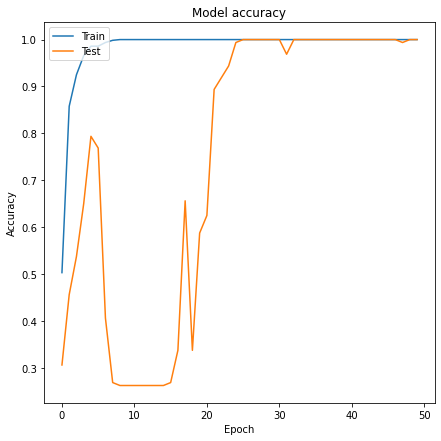

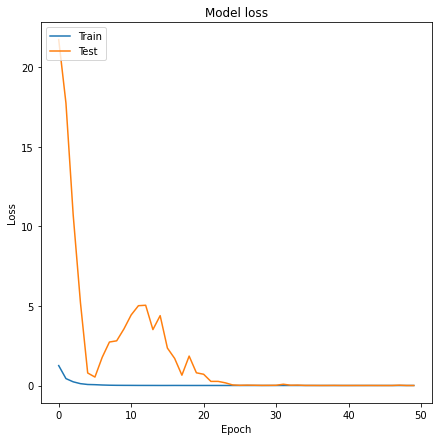

In [16]:
#Обучение на втором наборе (80/20)

hist = model.fit(X_train_2, Y_train_2, batch_size = batch, epochs = epc, validation_data=(X_test_2, Y_test_2))

test_acc = model.evaluate(X_train_2,  Y_train_2, verbose = 2)
print("\nТочность на тренировочных(обучающих) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
test_acc = model.evaluate(X_test_2,  Y_test_2, verbose = 2)
print("\nТочность на проверочных(тестовых) данных: %.3f" % test_acc[1])
print("%s: %.3f" % (model.metrics_names[0], test_acc[0])) # loss (потери)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('321.png')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('322.png')
plt.show()